### Neshyba, 2022
# Path Independence as an existence test

It would be a cruel joke on you if our entropy surfaces were not *really* entropy, but some path-dependent pretenders. But how do we know? Well, you can literally test for path-inddependence of the thermodynamic surface. Assuming you're working with at T,P state space, for example, how if you compared these:

1. Construct one surface by integrating the slopes *temperature-first*, followed by integrating over the pressure. 
1. Construct another surface by integrating the slopes *pressure-first,* then over temperature. 

If you get the same surface, you could conclude that changes in the function when you cruise through state space really are path-independent -- which in turn would mean that the function really exists. 

In the cells below, you'll consider two differential equations of state, defined by

$$
dA = \frac 1 {T^2} dT + \frac 1 {TP} dP \ \ \ \ (1)
$$

and

$$
dB = P dT + T dP \ \ \ \ (2)
$$

Your job is to figure out which exists, $A(T,P)$ or $B(T,P)$, using the cross-integration test. How exactly? Well, we have a function, called PL.Integrator, that does the integration for us! Crucially, this function lets us control the order in which the integration is carried out. Specifically, if you want PL.Integrator to integrate of *temperature* first, specify "axis=0" at the end of the argument list. If you want to make it *pressure-first,* specify "axis=1."  

## Learning Goal
1. I can use the cross-integration method to determine whether an alleged thermodynamic function actually exists.

In [1]:
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d

In [2]:
%matplotlib notebook

### State space (this will work for both A and B)
The code below loads in a T/P state space.

In [3]:
Tgrid,Pgrid = PL.Statespace([200,400,50],[1,10,51])
Tgrid = AssignQuantity(Tgrid,'K')
Pgrid = AssignQuantity(Pgrid,'bar')
Tlabel = "T "+str(Tgrid.units)
Plabel = "P "+str(Pgrid.units)

### Investigating the existence of $A(T,P)$
The code below constructs candidate state function "$A$" from the coefficients in front of $dT$ and $dP$ in Eq. (1).

/home/instructor/pchem/source/Week_10b.PathIndependence/PchemLibrary.py:136: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  Fgrid[i,:] = integral_along_y


<IPython.core.display.Javascript object>


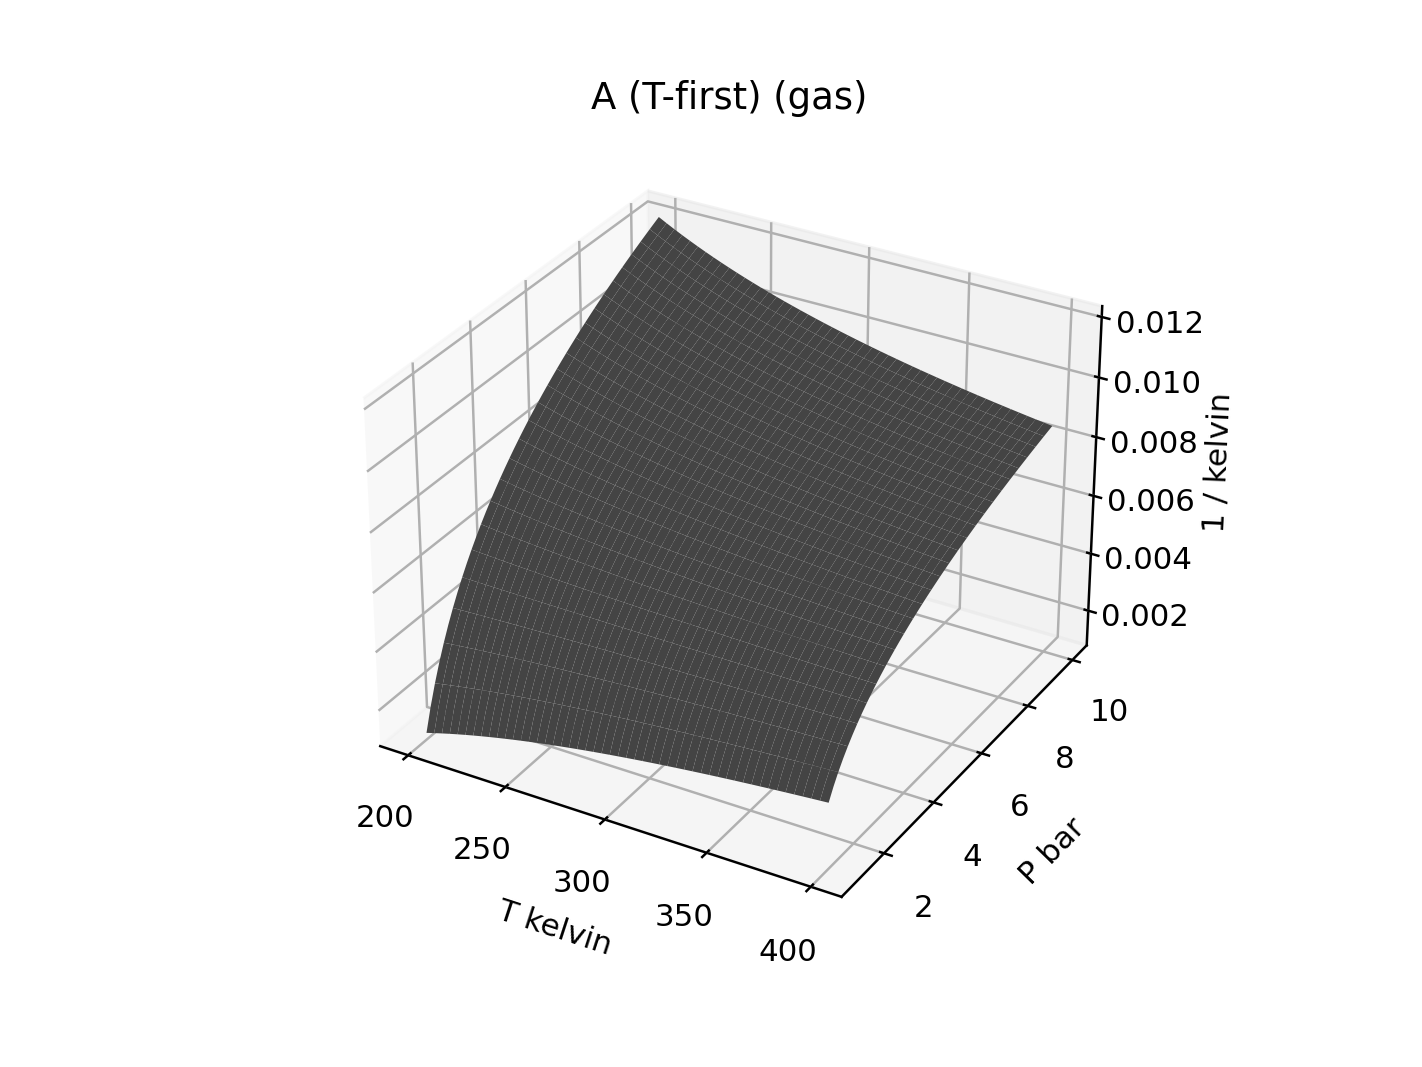

/home/instructor/pchem/source/Week_10b.PathIndependence/PchemLibrary.py:145: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  Fgrid[:,i] = integral_along_x


<IPython.core.display.Javascript object>


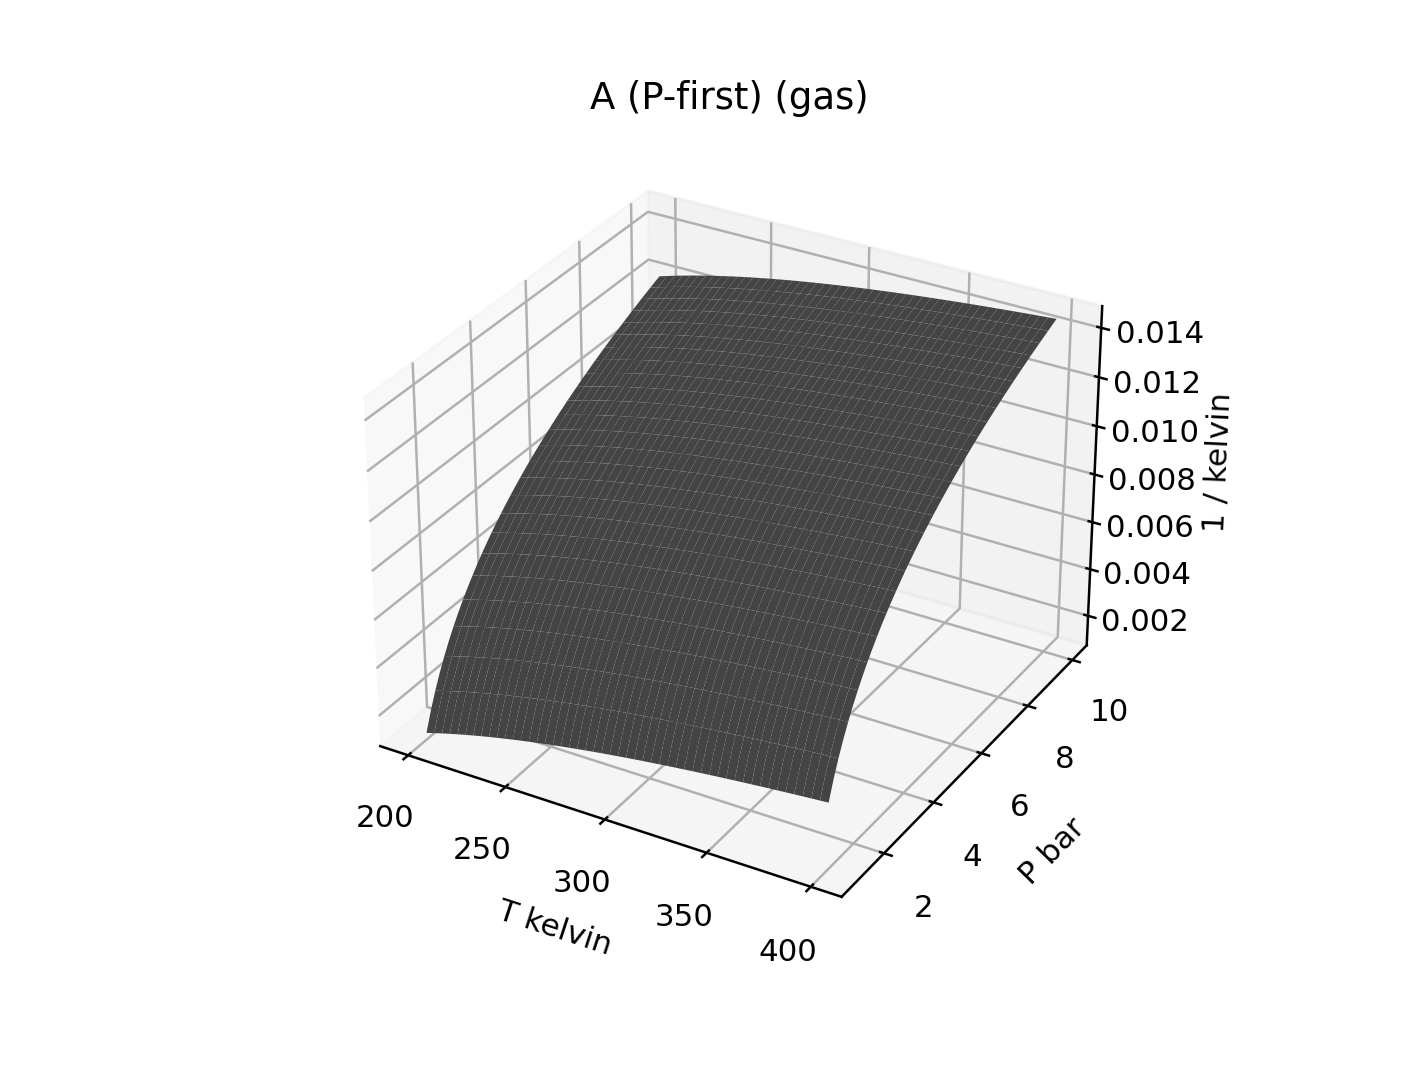

Text(0.5, 0.92, 'A (P-first) (gas)')

In [4]:
# Getting the coefficients according to Eq. (1)
dAdT = 1/Tgrid**2
dAdP = 1/(Tgrid*Pgrid)

# Integrate with respect to temperature first, then pressure (that's what "axis=0 does")
A_Tfirst = PL.Integrator([Tgrid, Pgrid], dAdT, dAdP, AssignQuantity, axis=0)
ax = PL.plot_surface(Tgrid, Pgrid, A_Tfirst, color='gray')
ax.set_xlabel(Tlabel)
ax.set_ylabel(Plabel)
ax.set_zlabel(str(A_Tfirst.units))
ax.set_title('A (T-first) (gas)')

# Now integrate with respect to pressure first, then temperature ("axis=1"), and display
### BEGIN SOLUTION
A_Pfirst = PL.Integrator([Tgrid, Pgrid], dAdT, dAdP, AssignQuantity, axis=1)
ax = PL.plot_surface(Tgrid, Pgrid, A_Pfirst, color='blue')
ax.set_xlabel(Tlabel)
ax.set_ylabel(Plabel)
ax.set_zlabel(str(A_Pfirst.units))
ax.set_title('A (P-first) (gas)')
### END SOLUTION

### Pause for analysis
If it looks like these two functions are the same, then we'd conclude that $A(T,P)$ exists. If they're different then $A(T,P)$ does not exist (it's a "pretender!"). What do you think?

### BEGIN SOLUTION
### END SOLUTION

### Investigating the existence of $B(T,P)$
In the cell below, construct candidate state function "$B$" from the coefficients in front of $dT$ and $dP$ in Eq. (2).

<IPython.core.display.Javascript object>


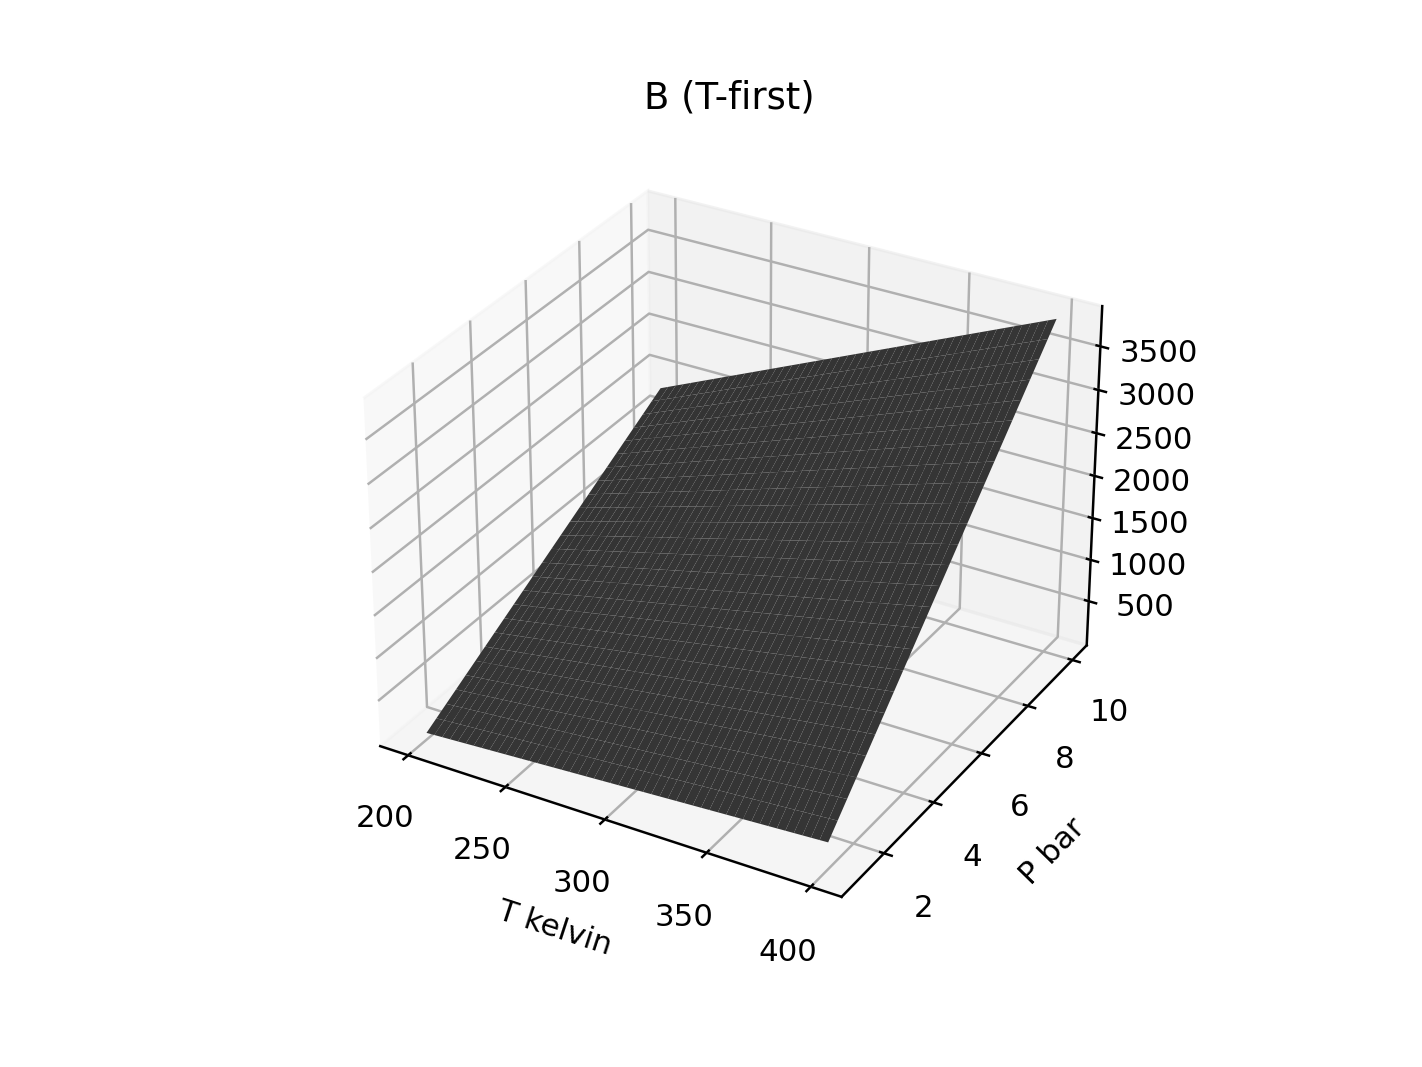

<IPython.core.display.Javascript object>


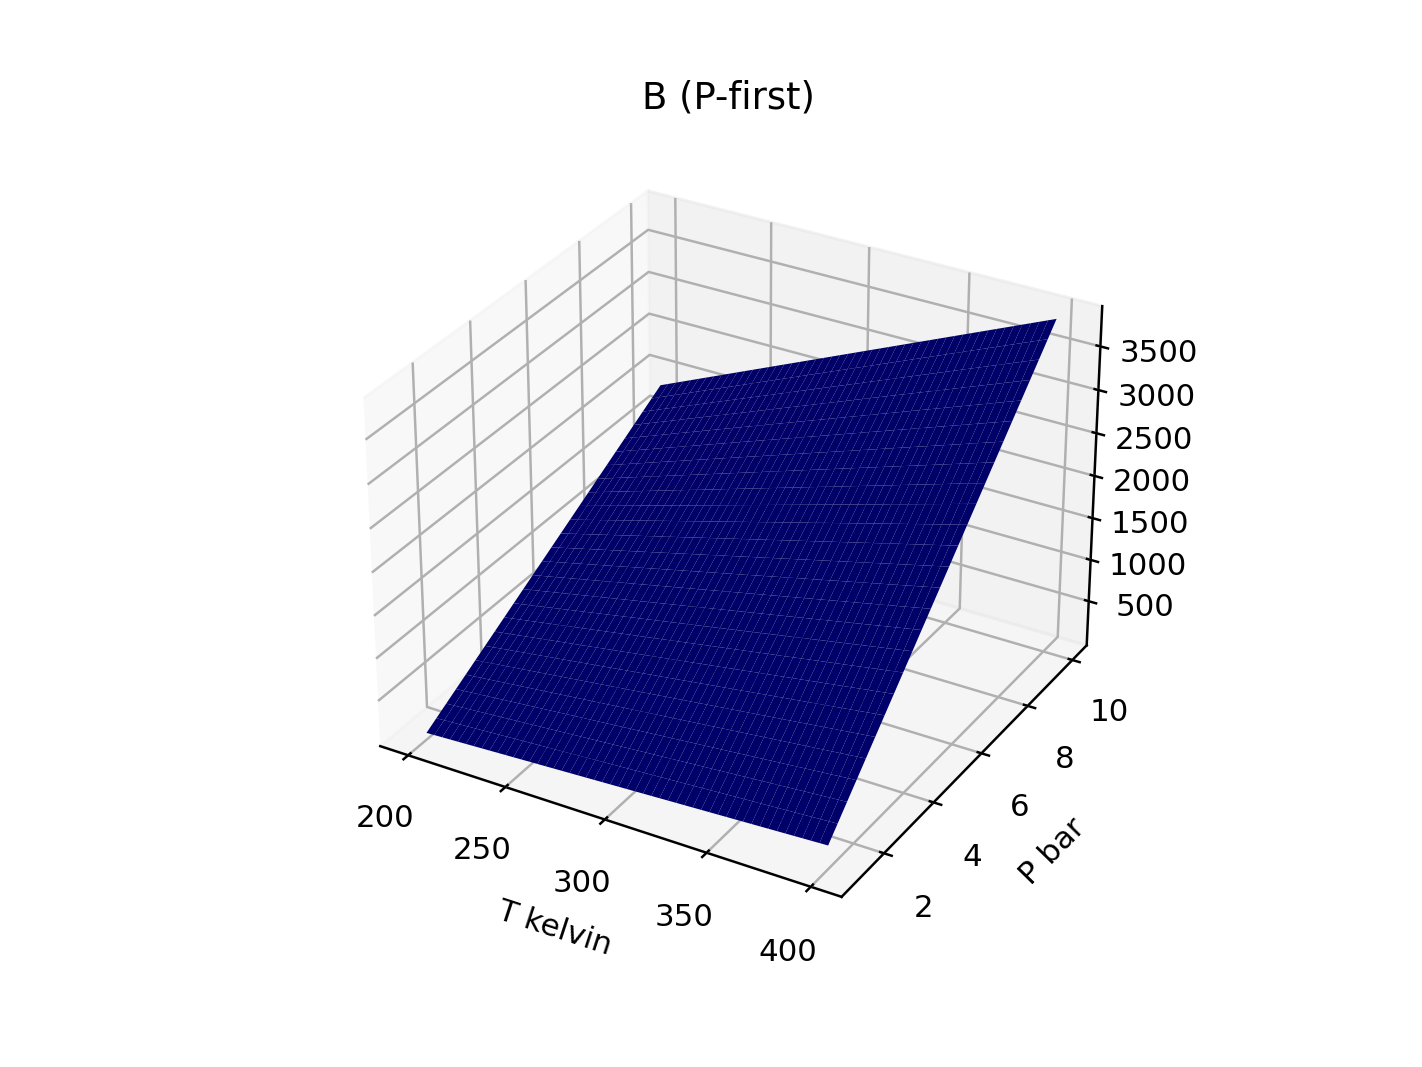

Text(0.5, 0.92, 'B (P-first)')

In [5]:
# Checking out B
### BEGIN SOLUTION

# Getting the slopes
dBdT = Pgrid
dBdP = Tgrid


# Integrating
B_Tfirst = PL.Integrator([Tgrid, Pgrid], dBdT, dBdP, AssignQuantity)
B_Pfirst = PL.Integrator([Tgrid, Pgrid], dBdT, dBdP, AssignQuantity, axis=1)

# Graphing
ax = PL.plot_surface(Tgrid, Pgrid, B_Tfirst, color='gray')
ax.set_xlabel(Tlabel)
ax.set_ylabel(Plabel)
ax.set_title('B (T-first)')

ax = PL.plot_surface(Tgrid, Pgrid, B_Pfirst, color='blue')
ax.set_xlabel(Tlabel)
ax.set_ylabel(Plabel)
ax.set_title('B (P-first)')

### END SOLUTION

### Pause for analysis
If it looks like these two functions are the same, then we'd conclude that $B(T,P)$ exists. If they're different then $B(T,P)$ does not exist (it's a "pretender!"). What do you think?

### BEGIN SOLUTION
### END SOLUTION

### Refresh/save/validate/close/submit/logout